<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [1]:
# Installing the libraries with the specified version.
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

## Importing necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.initializers import HeNormal, HeUniform

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report

import random
import time


# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [4]:
# load the dataset
bank_data = pd.read_csv('bank-1.csv')

In [5]:
# Copy dataset for reference
data = bank_data.copy()

## Data Overview

In [6]:
# View top 5 row of dataset
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# View last 5 rows of dataset
data.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
# Check shape of dataset
data.shape

(10000, 14)

In [9]:
# Check the data types of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are total 14 columns with 11 numerical type and 3 object type
* None of the column has null values.

##### Check statistical summary of dataset


In [10]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


* The dataset has 10000 rows, uniquiely identified by RowNumber and CustomerId
* The CreditScore ranges from 350 to 850, with an average of 650.53, showing most customers have a moderate financial realibilty, though variability exists.
* Customers' Age spans from 18 to 92 years, with an average age of 38.92 and a moderate spread, suggesting a diverse age distribution.
* The Tenure of customers with the bank averages 5 years, ranging from new accounts (0 years) to a maximum of 10 years.
* Balance varies widely, from dollar 0 to a maximum of 250,898.09, with an average of $76,485.89, indicating significant financial diversity among customers.
* On average, customers hold 1.53 products, with most having 1 or 2, though some hold as many as 4.
* About 71% of customers have a credit card.
* Roughly 51.5% of customers are active members, showing an almost even split between active and inactive users.
* EstimatedSalary spans a wide range from 11.58 to 199,992.48 dollars, averaging 100,090.24.
* Approximately 20.37% of customers have exited (churned), signaling potential areas for retention strategies.

In [11]:
# Summary of object type attributes
data.describe(include='object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [12]:
data['Geography'].value_counts(normalize=True)

,proportion
Geography,
France,0.5014
Germany,0.2509
Spain,0.2477


* Majority of the customers are from France followed by Germany & Spain

In [13]:
data['Gender'].value_counts(normalize=True)

,proportion
Gender,
Male,0.5457
Female,0.4543


* Around 55% male customers are there and 45% female.

## Exploratory Data Analysis

### Univariate Analysis

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observation on CreditScore

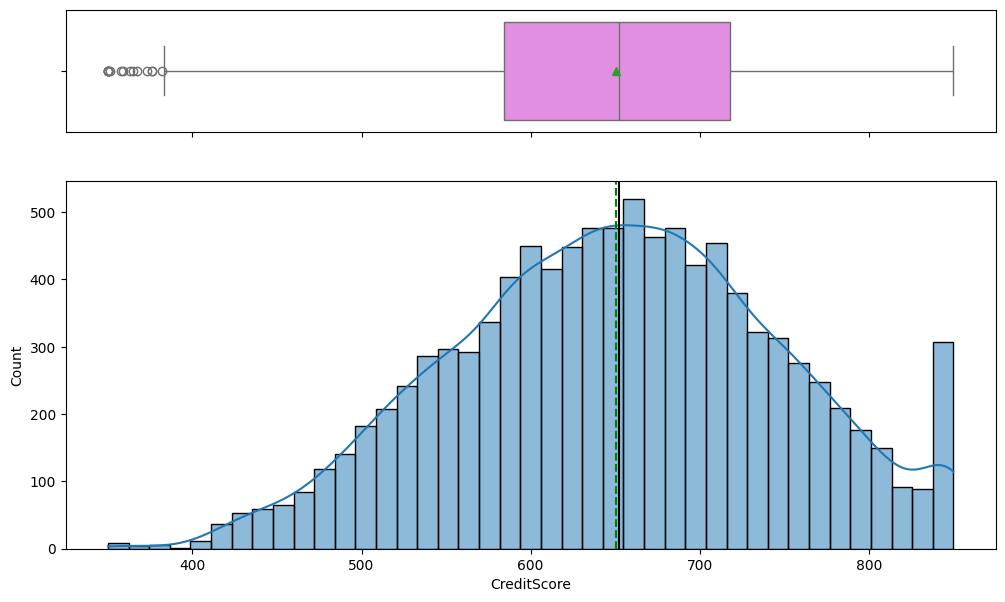

In [16]:
histogram_boxplot(data, 'CreditScore', kde=True)

* Data is normally distributed with few outliers on lower end

#### Observations on Age

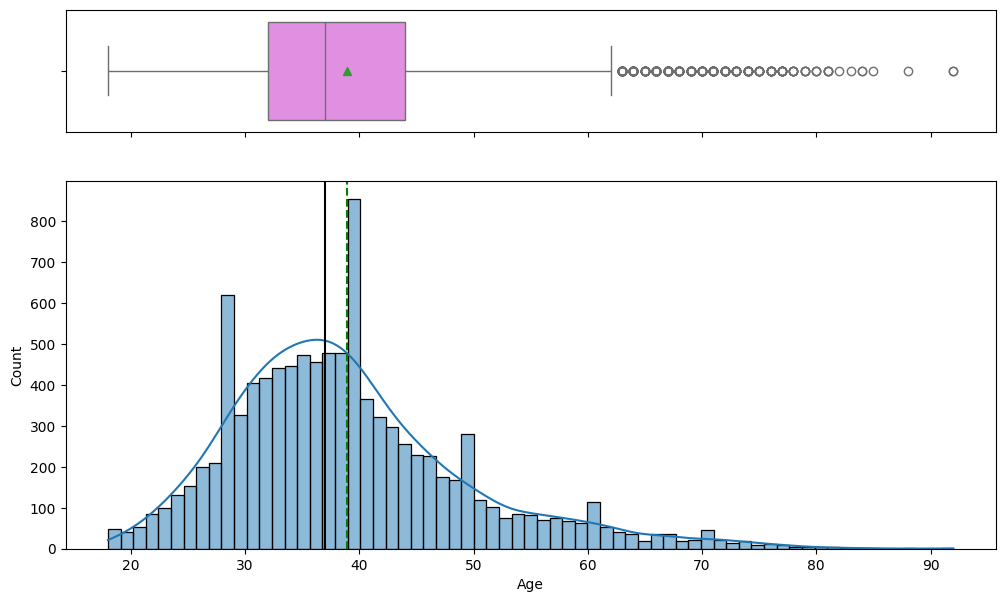

In [17]:
histogram_boxplot(data, 'Age', kde=True)

* Data is normally distributed with some peaks around age 28, 39 and 49
* Median is 37, there are many outliers on higher end showing some of the customers are above 60 years

#### Observations on Balance

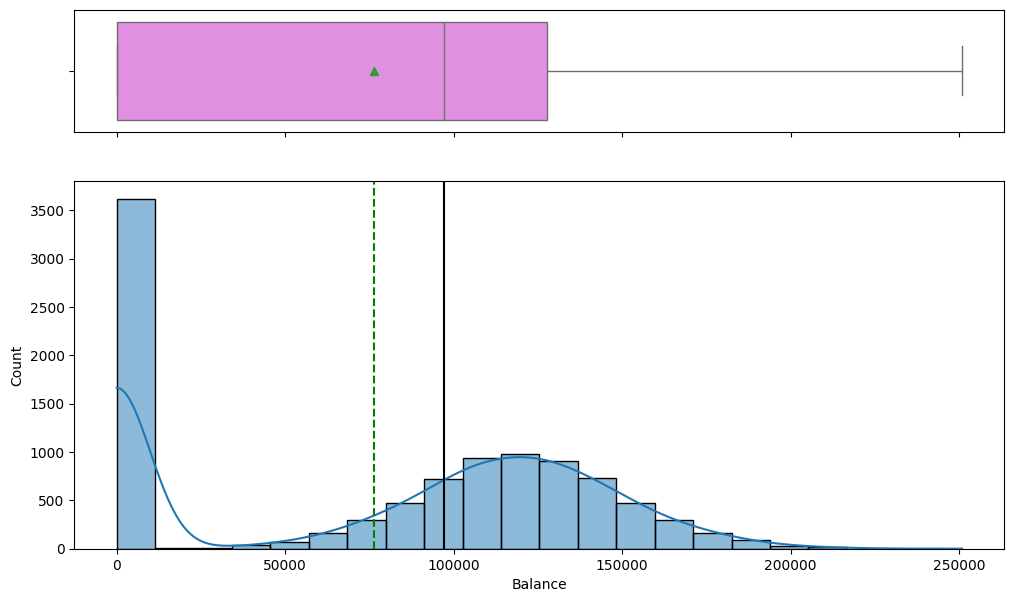

In [18]:
histogram_boxplot(data, 'Balance', kde=True)

* Balance varies from 0 to 250k, with mean around 76k and median around 97k
* There are no outliers in the data

#### Observations on EstimatedSalary

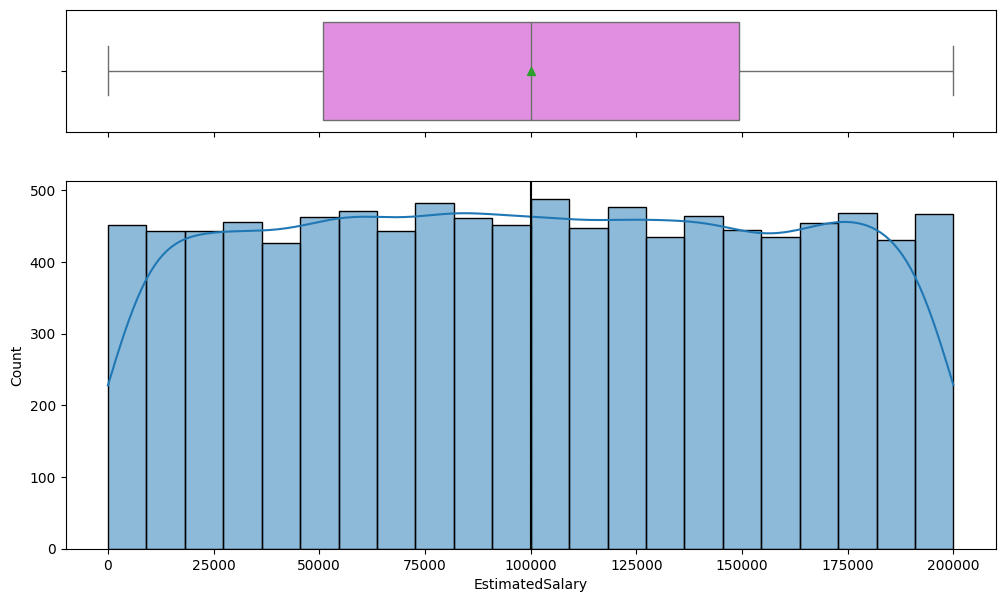

In [19]:
histogram_boxplot(data, 'EstimatedSalary', kde=True)

* Estimated salary seems to be uniformally distributed with no outliers
* On an average Salary is arouund 100k, ranges to max 200k

#### Observations on Geography

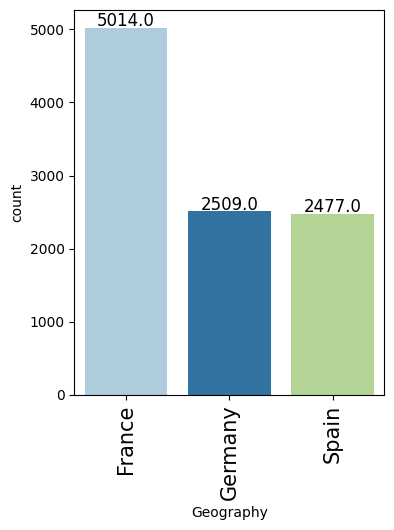

In [20]:
labeled_barplot(data, 'Geography')

* Most of the customers are from France, which is around 50% of total customers. Followed by Germany 25% & Spain 24%

#### Observation on Gender

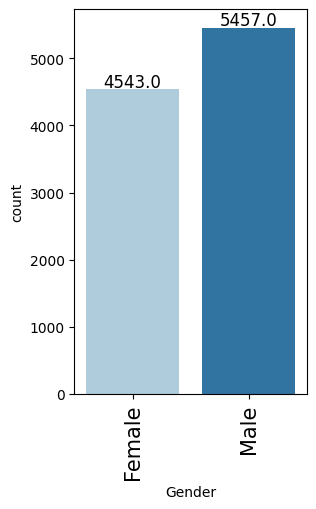

In [21]:
labeled_barplot(data, 'Gender')

* Around 55% male and 45% female customers are there, which indicates slighly higher % of male customers

#### Observations on Tenure

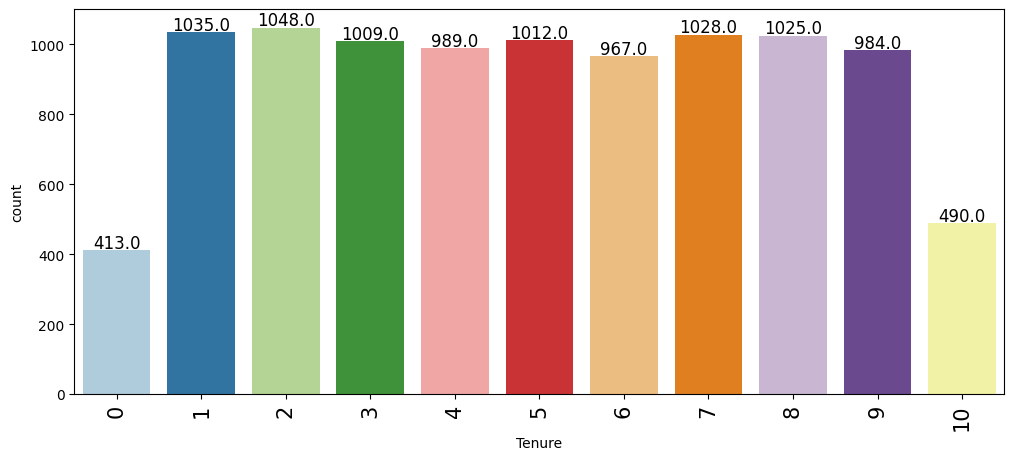

In [22]:
labeled_barplot(data, 'Tenure')

* As it shows, Tenure of the customers varies from 0 to 10 years, the % of customer for 1 to 9 years is almost 10% each. for 0 and 10 years there are slighty less number of customers


#### Observation on HasCrCard


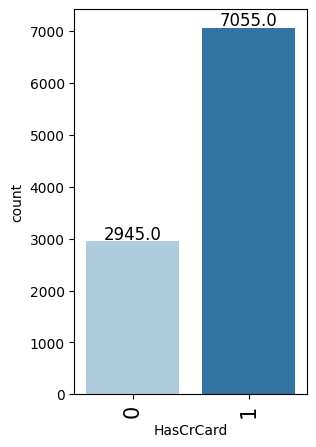

In [23]:
labeled_barplot(data, 'HasCrCard')

In [24]:
data['HasCrCard'].value_counts(normalize=True)

,proportion
HasCrCard,
1,0.7055
0,0.2945


* Around 70% of the customers has credit card


#### Observations on NumOfProducts

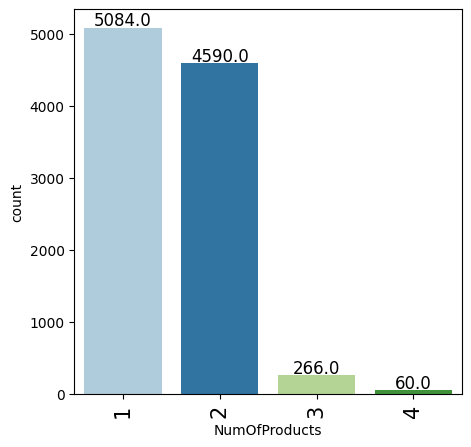

In [25]:
labeled_barplot(data, 'NumOfProducts')

* ~50% customer has only one product purchased through the bank.
* Around 45% has 2 products parchased through the bank
* ~2% has 3 products with bank and very minial has 4 products

#### Observations on IsActiveMember

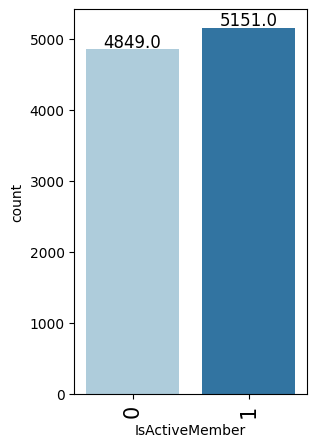

In [26]:
labeled_barplot(data, 'IsActiveMember')

* 51% mambers are actively using bank products where as 48% are inactive. Here bank needs to check the reason behind inactiveness and work on action items to increase % of active members


#### Observations on Exited

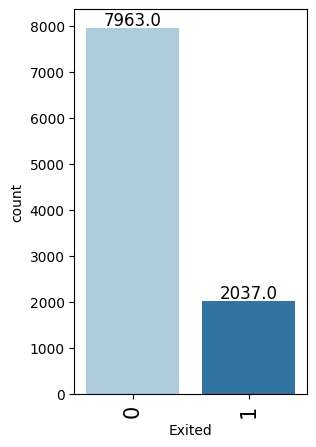

In [27]:
labeled_barplot(data, 'Exited')

* Bar plot shows around 20% of the customers has left the bank within 6 months. Here bank has to check for retension policies for customers.

### Bivariate Analysis

In [28]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Exited vs CreditScore


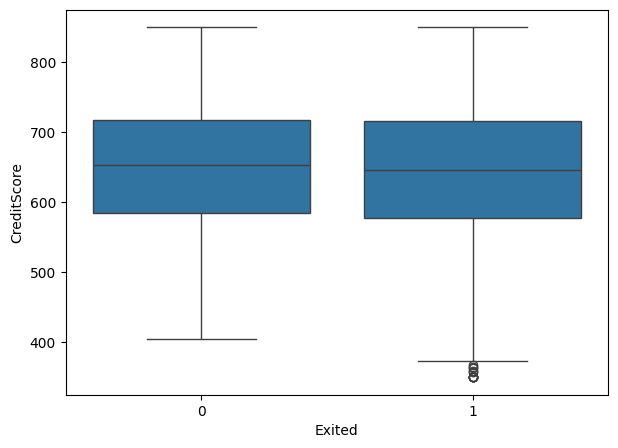

In [29]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=data, x='Exited', y='CreditScore')
plt.show()

* Exited and non exited customer shows majority of score between ~600 to 700
* There is no specific differentiation can be done based on credit score for exited or non exited customers

#### Exited vs Age

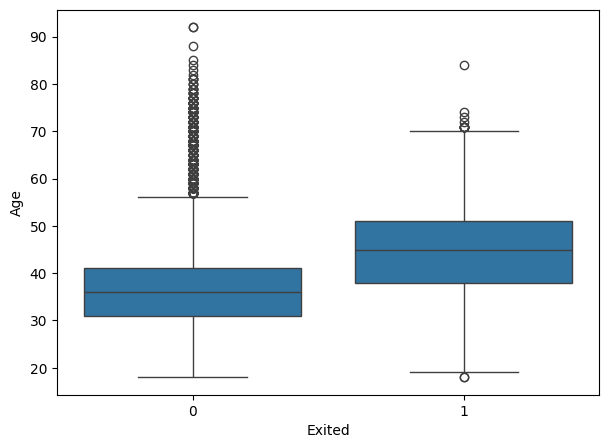

In [30]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=data, x='Exited', y='Age')
plt.show()

* Majority of customer letf the bank are from age group 40 to 55
* There are some outliers above age 70
* The customers chose to stay with bank are of middle age group aroun 30 to 40

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


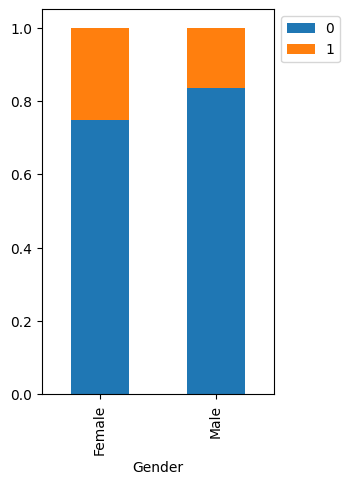

In [31]:
stacked_barplot(data, 'Gender', 'Exited')

* There is slight higher trend shows in Female customer who left the bank compare to Male

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


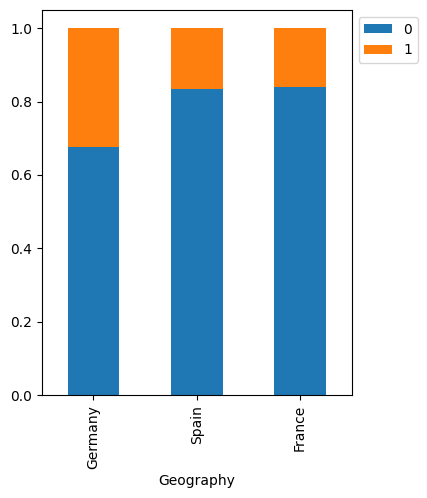

In [32]:
stacked_barplot(data, 'Geography', 'Exited')

In [33]:
data.groupby('Geography')['Exited'].value_counts(normalize=True).unstack() * 100

Exited,0,1
Geography,,
France,83.845233,16.154767
Germany,67.556796,32.443204
Spain,83.326605,16.673395


* Customers from Germany location have exited (~32%) the bank more than other location
* Spain and France show around 16% exited customers

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


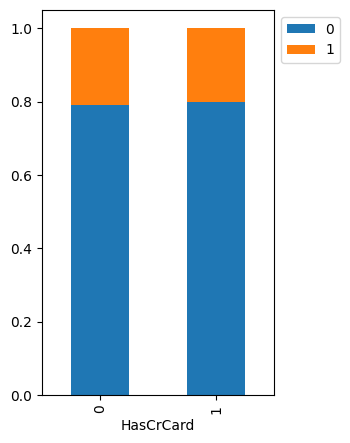

In [34]:
stacked_barplot(data, 'HasCrCard', 'Exited')

* It shows similar trend for customers who has credit cards and not having credit cards

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


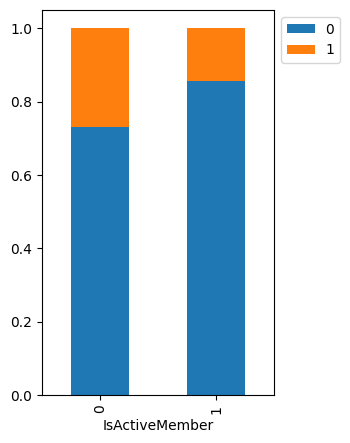

In [35]:
stacked_barplot(data, 'IsActiveMember', 'Exited')

* There is majority of inactive members who has exited the bank

#### Exited Vs Tenure

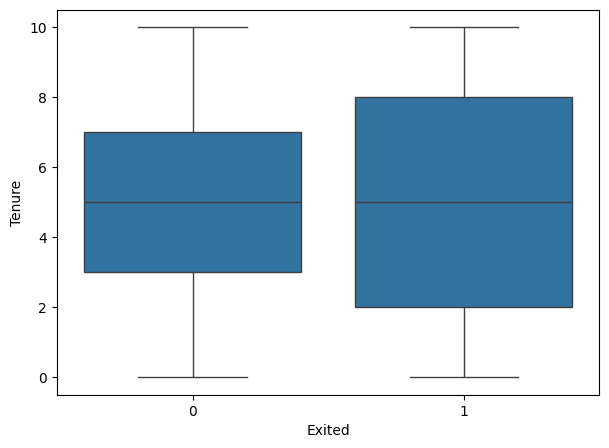

In [36]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=data, x='Exited', y='Tenure')
plt.show()

* Around 75% customer left with tenure varies from 2 to 8 years

#### Exited Vs Balance

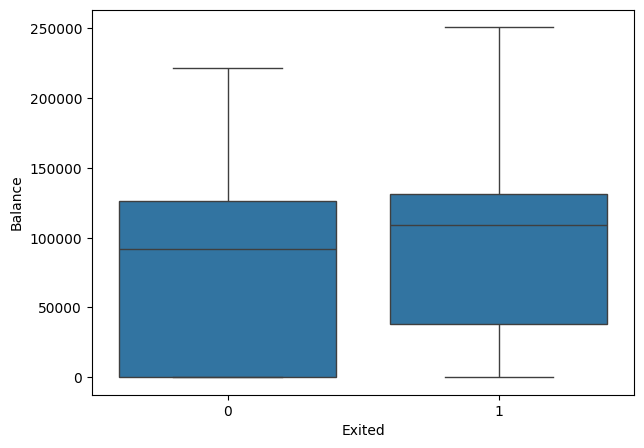

In [37]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=data, x='Exited', y='Balance')
plt.show()

* Majority of Exicted customers shows balance around 50k to 150k

#### Exited Vs Number of Products

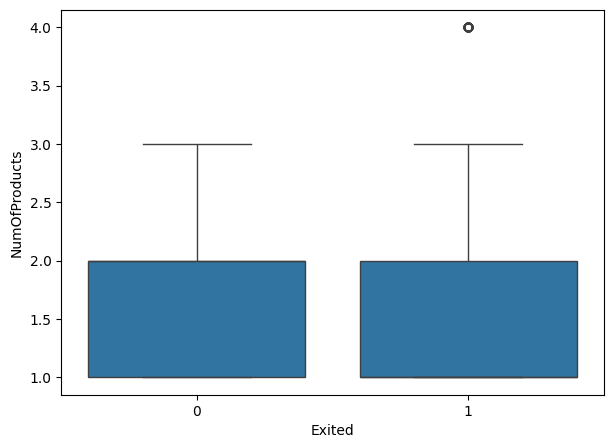

In [38]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=data, x='Exited', y='NumOfProducts')
plt.show()

* It does not show any specific relation between number of products and Exited n non exited custoemers as both them have similar range of products purchased from bank

Exited Vs Estimated Salary

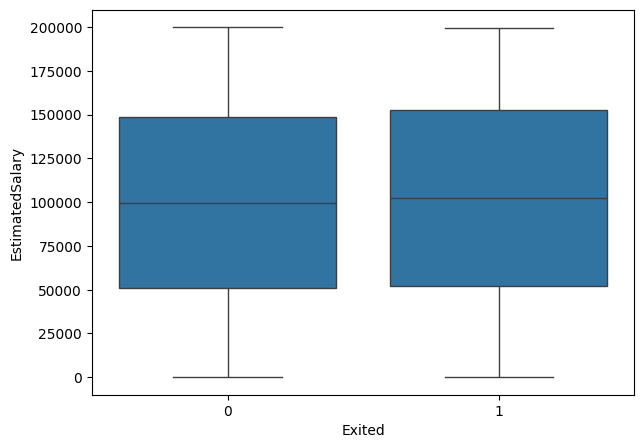

In [39]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=data, x='Exited', y='EstimatedSalary')
plt.show()

* Existed, Non-exited customers and Estimated Salary does not show any specific salary concentration. Both shows similar range so cannot imply specifc salary group according to left customers.

#### Correlation

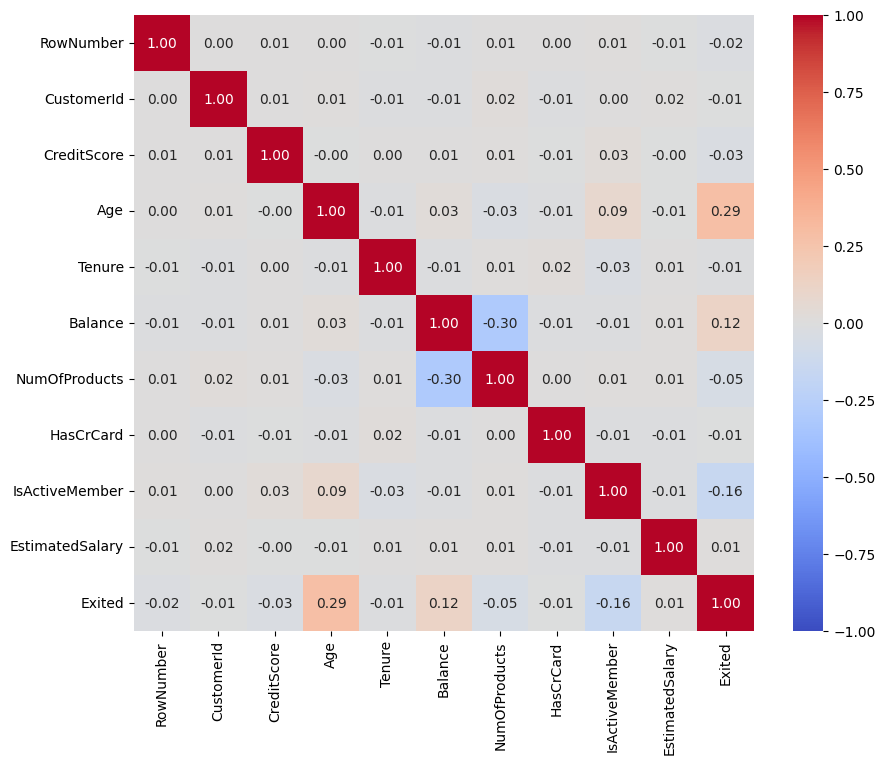

In [40]:
# Check correlation between valid columns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.show()

* There is no strong and condiderable relationship seen in any of the attribute.

#### Key Insights from EDA
* The Avg Credit Score seem to be almost the same for Active and Churned customers
* Young People seem to stick to the bank compared to older people
* The Average Bank Balance is high for Churned Customers
* The churning rate is high with German Customers
* The Churning rate is high among the Non-Active Members

## Data Preprocessing

In [41]:
# As there are some columns which are unique for all users and does not imply any dependency on predictions, let's remove the columns from dataset for simplication
data1 = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dummy Variable Creation

In [42]:
data1 = pd.get_dummies(data1, columns=['Geography', 'Gender'], drop_first=True, dtype=float)
data1.astype('float')
data1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


### Train-validation-test Split

In [43]:
X = data1.drop('Exited', axis=1)
y = data1['Exited']

In [44]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (10000, 11)
y shape: (10000,)


In [45]:
# Splitting the data into temporary and test set with ratio 80:20
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
X_temp.shape, X_test.shape, y_temp.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [47]:
# Spillting temporary dataset into train and validation set with ratio 90:10
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)

In [48]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((7200, 11), (800, 11), (7200,), (800,))

In [49]:
print("Training: \n", y_train.value_counts(normalize=True))
print("\n\nValidation: \n", y_val.value_counts(normalize=True))
print("\n\nTest: \n", y_test.value_counts(normalize=True))

Training: 
 Exited
0    0.79625
1    0.20375
Name: proportion, dtype: float64


Validation: 
 Exited
0    0.79625
1    0.20375
Name: proportion, dtype: float64


Test: 
 Exited
0    0.7965
1    0.2035
Name: proportion, dtype: float64


### Data Normalization

In [50]:
# feature scaling
# Separate features to scale
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
X_train[numerical_columns]=scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns]=scaler.fit_transform(X_val[numerical_columns])
X_test[numerical_columns]=scaler.fit_transform(X_test[numerical_columns])

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7200 entries, 6756 to 1558
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        7200 non-null   float64
 1   Age                7200 non-null   float64
 2   Tenure             7200 non-null   float64
 3   Balance            7200 non-null   float64
 4   NumOfProducts      7200 non-null   float64
 5   HasCrCard          7200 non-null   int64  
 6   IsActiveMember     7200 non-null   int64  
 7   EstimatedSalary    7200 non-null   float64
 8   Geography_Germany  7200 non-null   float64
 9   Geography_Spain    7200 non-null   float64
 10  Gender_Male        7200 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 675.0 KB


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
- False Positive (Type I Error):

You predict that the customer will exit, but the customer actually does not exit.
Impact: Loss of resources (e.g., offering retention incentives or unnecessary follow-ups to a customer who was not planning to leave).

- False Negative (Type II Error):

You predict that the customer will not exit, but the customer actually exits.
Impact: Loss of a valuable customer, as no action is taken to retain them. This is usually more costly than a false positive.



**Which metric to optimize?**
* Predicting a customer will not exit and the customer exits i.e. Loss of opportunity/ losing valuable customer. So, the false negatives should be minimized.

**How to reduce this loss i.e need to reduce False Negatives?**
* Bank wants to minimizing False Negatives is more important because losing a valuable customer can have a long-term financial impact. Therefore model needs to be optimized recall score


In [52]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
tf.config.experimental.enable_op_determinism()

##### Utility Functions

In [53]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

In [54]:
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

In [55]:
# Defining a function to plot loss/accuracy
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [56]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [57]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

* Let's create two blank dataframes that will store the recall values for all the models we build. This recall is

### Neural Network with SGD Optimizer

##### Model 1
* SGO optimizer
* Three layers, i/p with 64 neuron, hidden with 32 neuron and o/p with 1 neuron
* Epochs 50 & Batch size 32

In [59]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [60]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64,activation="relu",input_dim = X_train.shape[1]))  #input layer with 64 neurons and relu as activation function
model_1.add(Dense(32,activation="relu"))  # hidden layer with 32 neurons and relu as activation function
model_1.add(Dense(1,activation = 'sigmoid'))  # output layer for binary classification

In [61]:
# Defining SGD as optimizer to be used
optimizer = tf.keras.optimizers.SGD()

# Defining metric to be used
metric = 'accuracy'

In [62]:
# Compile the model with SGD optimizer
model_1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[metric])

In [63]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# Train the model
batch_size = 32
epochs = 50
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs, verbose=1, class_weight=cw_dict)
end=time.time()


Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5785 - loss: 1.3500 - val_accuracy: 0.7325 - val_loss: 0.5854
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7225 - loss: 1.1721 - val_accuracy: 0.7500 - val_loss: 0.5388
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7335 - loss: 1.0930 - val_accuracy: 0.7525 - val_loss: 0.5191
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7393 - loss: 1.0431 - val_accuracy: 0.7437 - val_loss: 0.5070
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7451 - loss: 1.0097 - val_accuracy: 0.7487 - val_loss: 0.4996
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7478 - loss: 0.9898 - val_accuracy: 0.7500 - val_loss: 0.4954
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7525 - loss: 0.9772 - val_accuracy: 0.7475 - val_loss: 0.4910
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7543 - loss: 0.9682 - val_accuracy: 0.

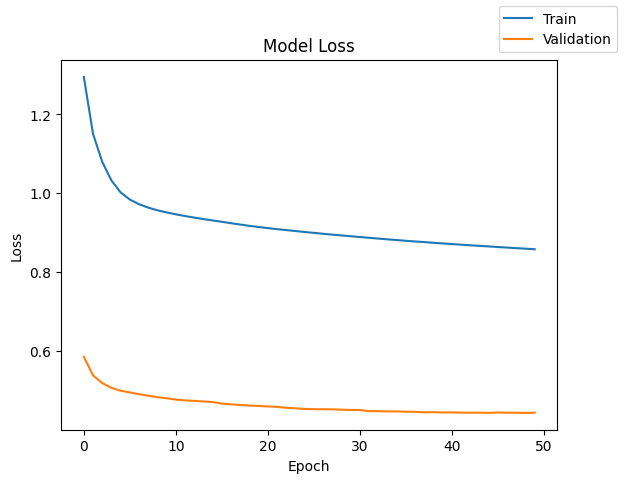

In [65]:
plot(history, 'loss')

* Train and Test validation curves seems to smooth after 20 epochs
* There is a difference between validation loss and training loss

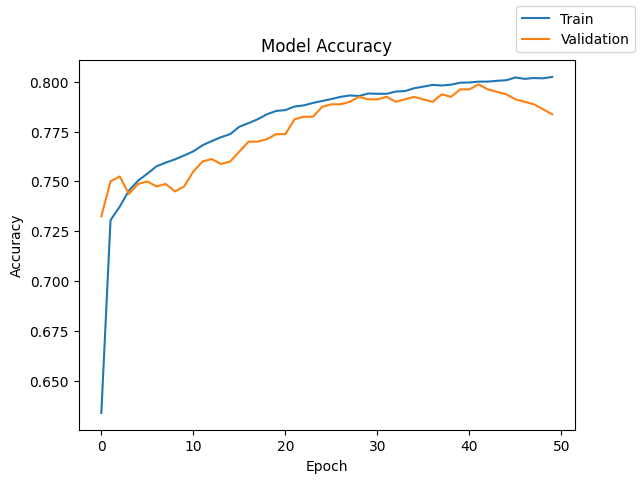

In [66]:
plot(history, 'accuracy')

* With some oscillation, accuracy is increasing for train and validation set
* To reduce oscillation let's try with adding momentum in next model

In [67]:
# Check model performance on training data
model_1_train_perf = model_performance_classification(model_1, X_train, y_train)
model_1_train_perf

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.798194,0.805044,0.502981,0.619135


In [68]:
# Check model performance on validation data
model_1_Val_perf = model_performance_classification(model_1, X_val, y_val)
model_1_Val_perf

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Accuracy,Recall,Precision,F1 Score
0,0.78375,0.785276,0.481203,0.596737


* Train and validation scores as recall ~75% for both indicates model is generalizing well but  needs more improvement in score
* The rate of improvement over epochs can be better

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


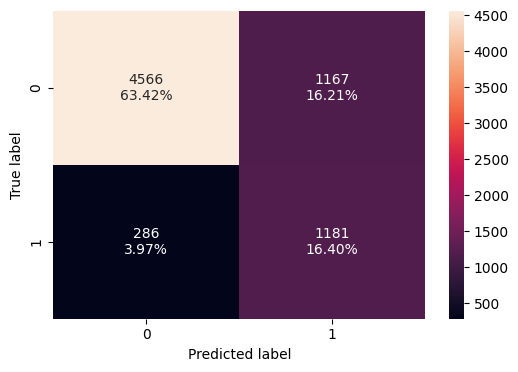

In [69]:
# Confusion matrix for train set
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
make_confusion_matrix(y_train, y_train_pred)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


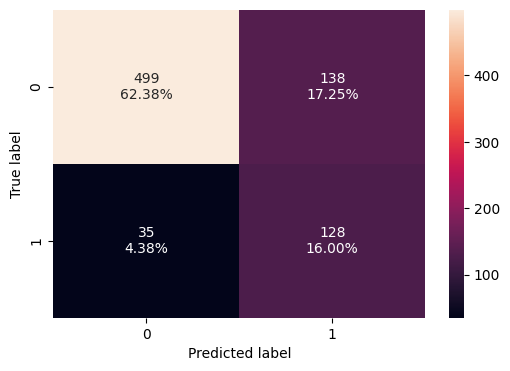

In [70]:
# Confusion matrix for validation set
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
make_confusion_matrix(y_val, y_val_pred)

##### Model 2
* Let's try adding momentum of 0.8 with SGD optimizer and keeping other parameter same as above

In [73]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [74]:
#Initializing the neural network
model_2 = Sequential()
model_2.add(Dense(64,activation="relu",input_dim = X_train.shape[1]))  #input layer with 64 neurons and relu as activation function
model_2.add(Dense(32,activation="relu"))  # hidden layer with 32 neurons and relu as activation function
model_2.add(Dense(1,activation = 'sigmoid'))  # output layer for binary classification

In [75]:
# Defining SGD as optimizer to be used
optimizer = tf.keras.optimizers.SGD(momentum=0.8)

# Defining metric to be used
metric = 'accuracy'
# metric = keras.metrics.Recall()

In [76]:
# Compile the model with SGD optimizer
model_2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[metric])

In [77]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
# Train the model
batch_size = 32
epochs = 50
start = time.time()
history = model_2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs, class_weight=cw_dict)
end=time.time()


Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6585 - loss: 1.2448 - val_accuracy: 0.6888 - val_loss: 0.5862
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7395 - loss: 1.0208 - val_accuracy: 0.7125 - val_loss: 0.5552
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7493 - loss: 0.9866 - val_accuracy: 0.7300 - val_loss: 0.5234
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7585 - loss: 0.9677 - val_accuracy: 0.7375 - val_loss: 0.5054
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7657 - loss: 0.9535 - val_accuracy: 0.7462 - val_loss: 0.4940
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7704 - loss: 0.9421 - val_accuracy: 0.7538 - val_loss: 0.4849
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7741 - loss: 0.9338 - val_accuracy: 0.7588 - val_loss: 0.4800
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7781 - loss: 0.9271 - val_accuracy: 0.

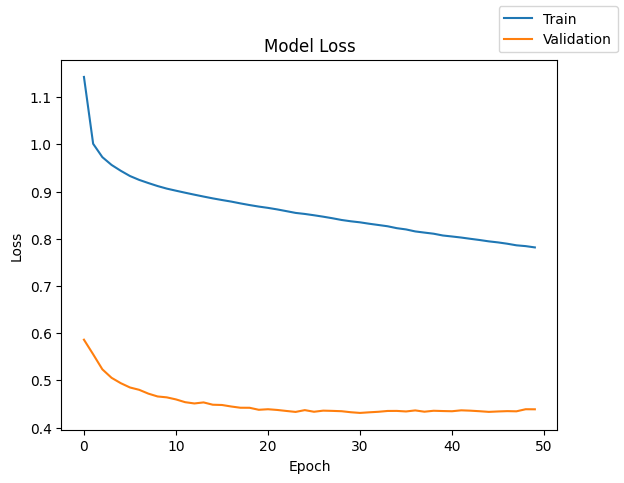

In [79]:
plot(history, 'loss')

* There is difference in train and validaton loss. Validation loss does not seems to be considerably changed

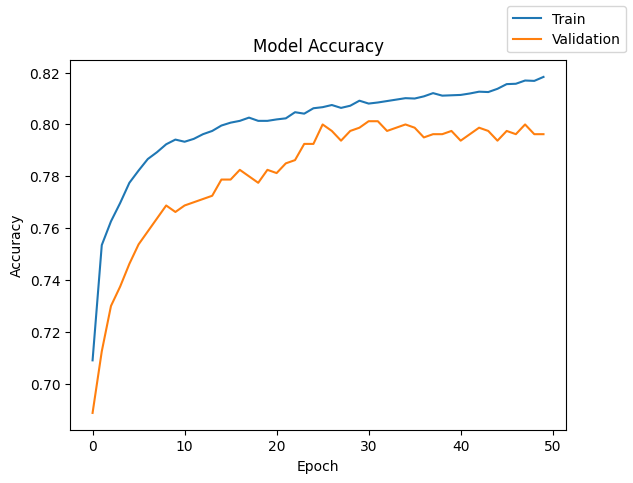

In [80]:
plot(history, 'accuracy')

* Training accuracy has increased but validation accuracy has decreased
* Adding momentum does not seem to be very helpful as accuracy has not converged smoothly

In [81]:
# Check model performance on training data
model_2_train_perf = model_performance_classification(model_2, X_train, y_train)
model_2_train_perf

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.822083,0.846626,0.54047,0.659761


In [82]:
# Check model performance on training data
model_2_Val_perf = model_performance_classification(model_2, X_val, y_val)
model_2_Val_perf

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Accuracy,Recall,Precision,F1 Score
0,0.79625,0.754601,0.5,0.601467


* Considering the recall score for training as 84% and validation 76%, Model might be overfitting and not generalizing well

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


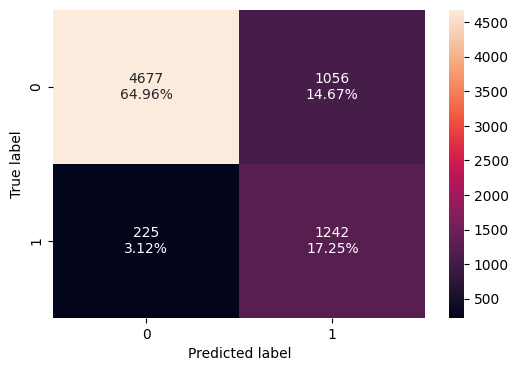

In [83]:
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
make_confusion_matrix(y_train, y_train_pred)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


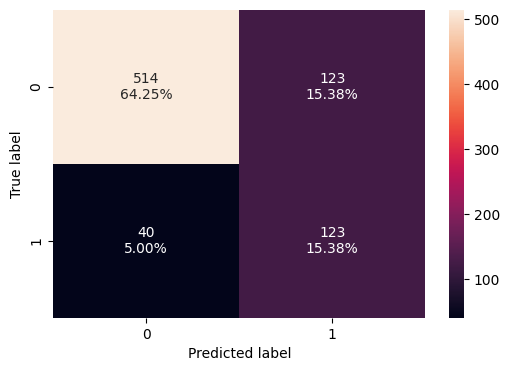

In [84]:
# Confusion matrix for validation set
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
make_confusion_matrix(y_val, y_val_pred)

## Model Performance Improvement

### Neural Network with Adam Optimizer

##### Model 3
* Let's change optimizer to adam and weight inilializer to HeNormal as it works well with Relu activation

In [85]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [86]:
#Initializing the neural network
model_3 = Sequential()
model_3.add(Dense(64,activation="relu",kernel_initializer=HeNormal(),input_dim = X_train.shape[1]))  #input layer with 64 neurons and relu as activation function with HeNormal weight initializer
model_3.add(Dense(32,activation="relu",kernel_initializer=HeNormal()))  # hidden layer with 32 neurons and relu as activation function with HeNormal weight initializer
model_3.add(Dense(1,activation = 'sigmoid'))

In [87]:
# Using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# Defining metric to be used
metric = 'accuracy'

In [88]:
# Compiling the model with binary cross entropy as loss function and accuracy as metrics
model_3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[metric])

In [89]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
# fitting the model
batch_size = 32
epochs = 50
start = time.time()
history = model_3.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs, verbose=1, class_weight=cw_dict)
end=time.time()

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6791 - loss: 1.1994 - val_accuracy: 0.7550 - val_loss: 0.5008
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7408 - loss: 1.0373 - val_accuracy: 0.7688 - val_loss: 0.4709
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7579 - loss: 0.9897 - val_accuracy: 0.7837 - val_loss: 0.4530
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7619 - loss: 0.9662 - val_accuracy: 0.7937 - val_loss: 0.4433
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7680 - loss: 0.9519 - val_accuracy: 0.7987 - val_loss: 0.4350
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7726 - loss: 0.9390 - val_accuracy: 0.8012 - val_loss: 0.4307
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7806 - loss: 0.9291 - val_accuracy: 0.8050 - val_loss: 0.4259
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7836 - loss: 0.9199 - val_accuracy: 0.

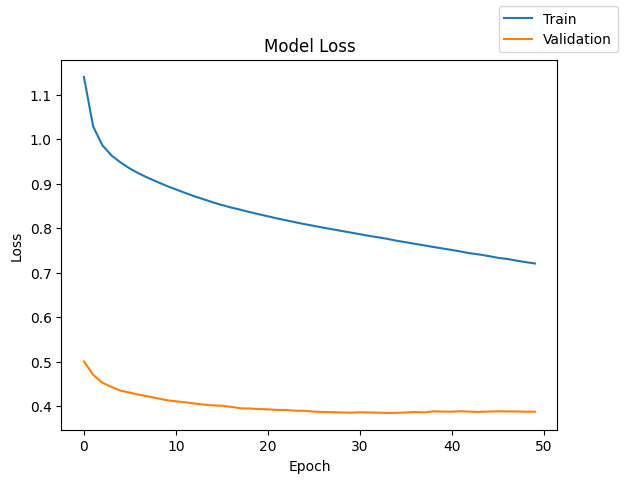

In [91]:
plot(history, 'loss')

* Training and validation loss has decrease slighly compare to model 2
* But there is still difference between training and validation loss and it does not seem to be varying further 20 epochs


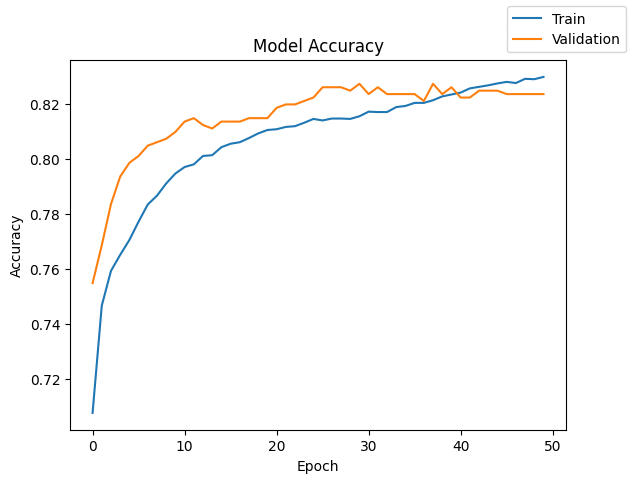

In [92]:
plot(history, 'accuracy')

* There is slight improvment in accuracy of train and validation compare to model 2

In [93]:
# Check model performance on training data set
model3_train_perf = model_performance_classification(model_3, X_train, y_train)
model3_train_perf

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.853333,0.809816,0.60458,0.692308


In [94]:
# Check model performance on validation data set
model3_val_perf = model_performance_classification(model_3, X_val, y_val)
model3_val_perf

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Accuracy,Recall,Precision,F1 Score
0,0.82375,0.711656,0.552381,0.621984


* Model has ~9% difference in recall score for train and validation set suggests model is not generalized well

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


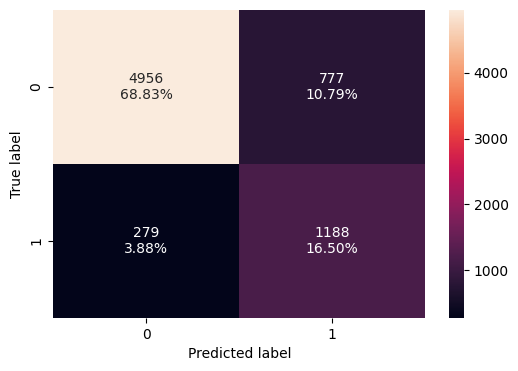

In [95]:
y_train_pred = model_3.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
make_confusion_matrix(y_train, y_train_pred)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


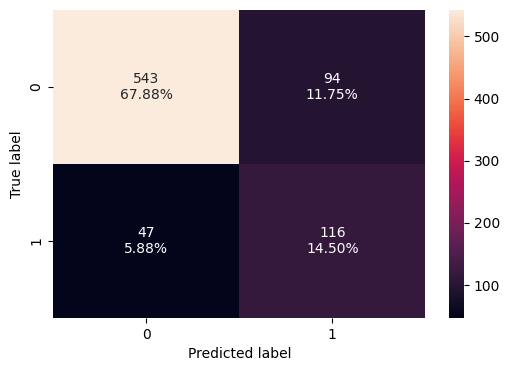

In [96]:
# Check confusion matrix for validaton
y_val_pred = model_3.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
make_confusion_matrix(y_val, y_val_pred)

In [97]:
# classification report for training set
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      5733
           1       0.60      0.81      0.69      1467

    accuracy                           0.85      7200
   macro avg       0.78      0.84      0.80      7200
weighted avg       0.88      0.85      0.86      7200



In [98]:
# Classification report for validation set
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       637
           1       0.55      0.71      0.62       163

    accuracy                           0.82       800
   macro avg       0.74      0.78      0.75       800
weighted avg       0.85      0.82      0.83       800



### Neural Network with Adam Optimizer and Dropout

##### Model 4
* Let's check by adding 2  droput layers (0.2 and 0.1) with adman optimizer

In [99]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [100]:
# Initializing the neural network
model_4 = Sequential()

# Adding the input layer with 64 neurons and ReLU as activation function
model_4.add(Dense(64, activation='relu',kernel_initializer=HeNormal(), input_dim=X_train.shape[1]))

# Adding Dropout with a ratio of 0.2
model_4.add(Dropout(0.2))

# Adding a hidden layer with 32 neurons and ReLU activation function
model_4.add(Dense(32, activation='relu',kernel_initializer=HeNormal()))

# Adding another hidden layer with 16 neurons and ReLU activation function
model_4.add(Dense(16, activation='relu',kernel_initializer=HeNormal()))

# Adding Dropout with a ratio of 0.1
model_4.add(Dropout(0.1))

# Adding the output layer with 1 neuron and sigmoid activation function (for binary classification)
model_4.add(Dense(1, activation='sigmoid'))

# Add optimizer
optimizer = tf.keras.optimizers.Adam()

# Compile the model
model_4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_4.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=50, batch_size=32, verbose=1, class_weight=cw_dict)


Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5660 - loss: 1.4309 - val_accuracy: 0.7487 - val_loss: 0.5116
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6803 - loss: 1.1738 - val_accuracy: 0.7675 - val_loss: 0.4774
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7104 - loss: 1.1103 - val_accuracy: 0.7862 - val_loss: 0.4648
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7321 - loss: 1.0847 - val_accuracy: 0.8037 - val_loss: 0.4497
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7365 - loss: 1.0641 - val_accuracy: 0.8000 - val_loss: 0.4484
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7531 - loss: 1.0238 - val_accuracy: 0.8125 - val_loss: 0.4277
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7622 - loss: 1.0229 - val_accuracy: 0.8138 - val_loss: 0.4303
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7696 - loss: 0.9962 - val_accuracy: 0.

In [101]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

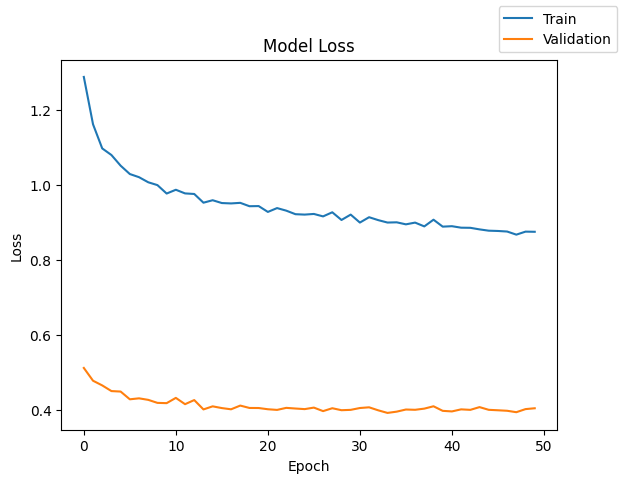

In [102]:
plot(history, 'loss')

* Adding dropout layer does not helped much.
* difference between training and validation is still large

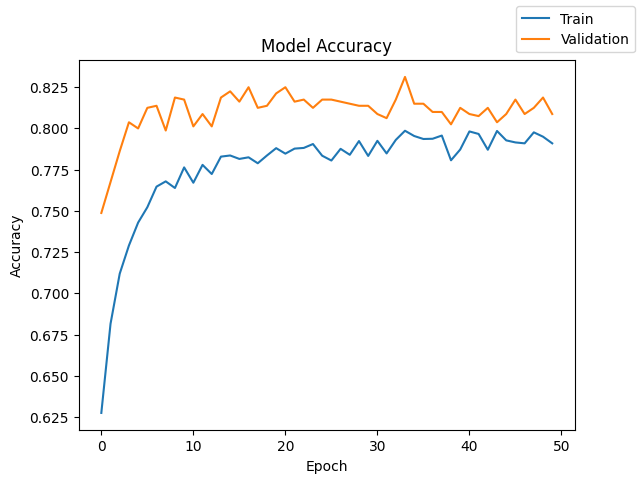

In [103]:
plot(history, 'accuracy')

* Accuracy is oscillating around 80% and not increasing much after certain epochs

In [104]:
# Check performance on train data
model_4_train_perf = model_performance_classification(model_4, X_train, y_train)
model_4_train_perf

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.814167,0.790729,0.529439,0.634226


In [105]:
# Check performance on validation data
model_4_val_perf = model_performance_classification(model_4, X_val, y_val)
model_4_val_perf

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Accuracy,Recall,Precision,F1 Score
0,0.80875,0.791411,0.520161,0.627737


* Recall is almost same for training and validation set suggests model is generalized well.

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


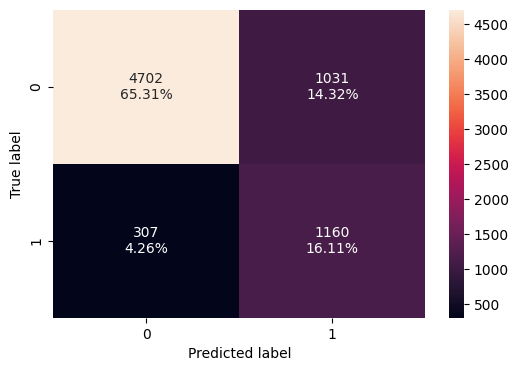

In [106]:
# Plot confusion matrix for train dataset
y_train_pred = model_4.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
make_confusion_matrix(y_train, y_train_pred)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


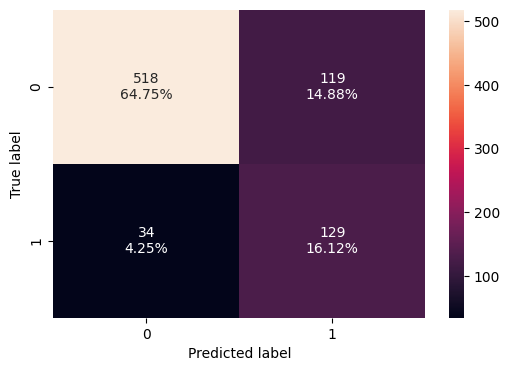

In [107]:
# Plot confusion matrxi for validation dataset
y_val_pred = model_4.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
make_confusion_matrix(y_val, y_val_pred)

In [108]:
#classification report training
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      5733
           1       0.53      0.79      0.63      1467

    accuracy                           0.81      7200
   macro avg       0.73      0.81      0.75      7200
weighted avg       0.86      0.81      0.83      7200



In [109]:
#classification report validation
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       637
           1       0.52      0.79      0.63       163

    accuracy                           0.81       800
   macro avg       0.73      0.80      0.75       800
weighted avg       0.85      0.81      0.82       800



### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [110]:
# Print count of labels before oversampling
print("Before OverSampling count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling count of label '0': {} \n".format(sum(y_train == 0)))

# Perform SMOTE on training data
sm  = SMOTE(random_state=42)
X_train_over, y_train_over= sm.fit_resample(X_train, y_train)

# Print count of labels after oversampling
print('After OverSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After OverSanpling, the shape of train_y: {} \n'.format(y_train_over.shape))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {}".format(sum(y_train_over == 0)))

Before OverSampling count of label '1': 1467
Before OverSampling count of label '0': 5733 

After OverSampling, the shape of train_X: (11466, 11)
After OverSanpling, the shape of train_y: (11466,) 

After OverSampling, count of label '1': 5733
After OverSampling, count of label '0': 5733


##### Model 5
* Let's try adjusting the imbalance data by SMOTE oversampling along with SGD optimizer, aslo with addition hidden layer of 16 neurons
* As we have balanced the class by oversampling the data we will not use class weight additionally here

In [111]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [112]:
# Initializing the model
model_5 = Sequential()

# Adding the input layer with 64 neurons and ReLU activation function
model_5.add(Dense(64, activation='relu',kernel_initializer=HeNormal(), input_dim=X_train_over.shape[1]))

# Adding a hidden layer with 43 neurons and ReLU activation function
model_5.add(Dense(32, activation='relu',kernel_initializer=HeNormal()))

# Adding another hidden layer with 16 neurons and ReLU activation function
model_5.add(Dense(16, activation='relu',kernel_initializer=HeNormal()))

# Adding the output layer with 1 neuron and sigmoid activation function (for binary classification)
model_5.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = tf.keras.optimizers.SGD()
model_5.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start = time.time()
history = model_5.fit(X_train_over, y_train_over, validation_data=(X_val,y_val), epochs=50, batch_size=32, verbose=1)
end=time.time()

Epoch 1/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5924 - loss: 0.6738 - val_accuracy: 0.6988 - val_loss: 0.5734
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7479 - loss: 0.5244 - val_accuracy: 0.7225 - val_loss: 0.5303
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7685 - loss: 0.4868 - val_accuracy: 0.7412 - val_loss: 0.5106
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7761 - loss: 0.4683 - val_accuracy: 0.7513 - val_loss: 0.5000
Epoch 5/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7849 - loss: 0.4573 - val_accuracy: 0.7525 - val_loss: 0.4959
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7888 - loss: 0.4499 - val_accuracy: 0.7538 - val_loss: 0.4927
Epoch 7/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7923 - loss: 0.4443 - val_accuracy: 0.7600 - val_loss: 0.4905
Epoch 8/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7947 - loss: 0.4397 - val_accuracy: 0.

In [113]:
print("Time taken in seconds ",end-start)

Time taken in seconds  46.53585696220398


In [114]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,395 (13.27 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

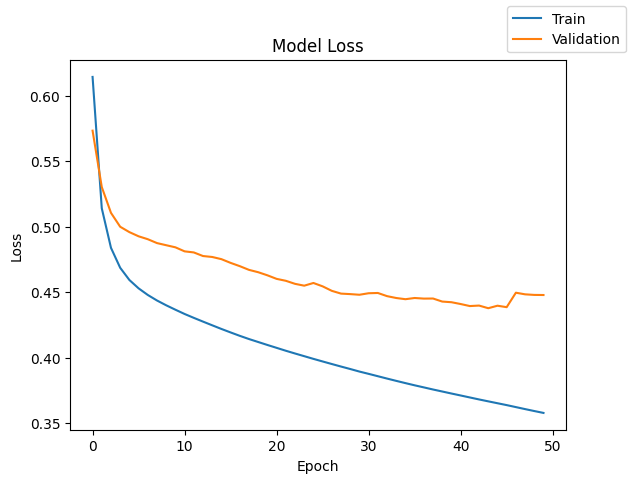

In [115]:
plot(history, 'loss')

* Difference between training and validation loss has reduced and converging better than earlier models

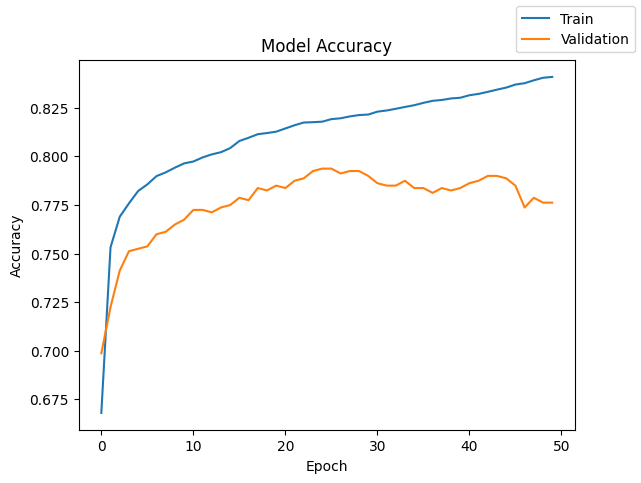

In [116]:
plot(history, 'accuracy')

* Validation accuracy is reduced and less than training accuracy But converging better than earlier models

In [117]:
# Check model performance on train set
model_5_train_perf = model_performance_classification(model_5, X_train_over, y_train_over)
model_5_train_perf

359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.843276,0.867609,0.827345,0.846999


In [118]:
# Check model performance on validation set
model_5_val_perf = model_performance_classification(model_5, X_val, y_val)
model_5_val_perf

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Accuracy,Recall,Precision,F1 Score
0,0.77625,0.723926,0.468254,0.568675


* There is difference between training and validation recall more than 10% suggests mmodel is not generalizing well on unknown data

359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


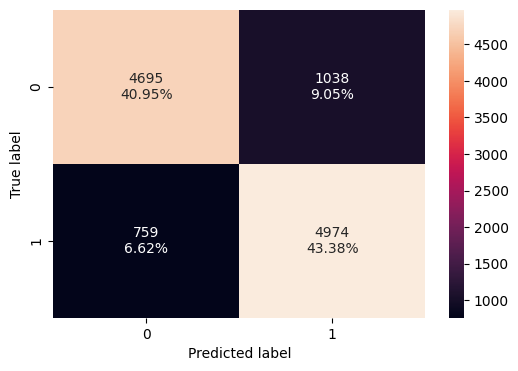

In [119]:
# Plot confusion matrix
y_train_pred = model_5.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
make_confusion_matrix(y_train_over, y_train_pred)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


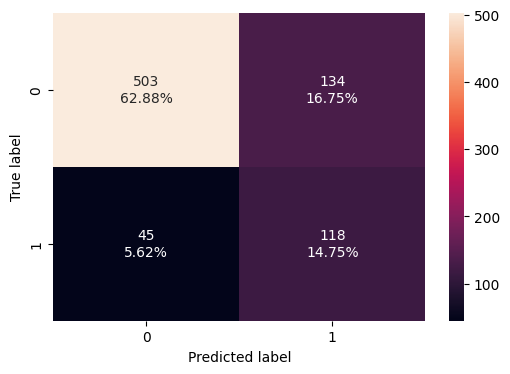

In [120]:
# Plot confusion matrxi for validation set
y_val_pred = model_5.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
make_confusion_matrix(y_val, y_val_pred)

In [121]:
# Classification Report
cr=classification_report(y_train_over,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      5733
           1       0.83      0.87      0.85      5733

    accuracy                           0.84     11466
   macro avg       0.84      0.84      0.84     11466
weighted avg       0.84      0.84      0.84     11466



In [122]:
# Classification report validation
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       637
           1       0.47      0.72      0.57       163

    accuracy                           0.78       800
   macro avg       0.69      0.76      0.71       800
weighted avg       0.83      0.78      0.79       800



### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer


##### Model 6
* Let's try wiht adam optimizer and balanced (oversampled data)
* As we have balanced the class by oversampling the data we will not use class weight additionally here

In [123]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [124]:
# Initializing the model
model_6 = Sequential()

# Adding the input layer with 64 neurons and ReLU activation function
model_6.add(Dense(64, activation='relu',kernel_initializer=HeNormal(), input_dim=X_train_over.shape[1]))

# Adding a hidden layer with 43 neurons and ReLU activation function
model_6.add(Dense(32, activation='relu',kernel_initializer=HeNormal()))

# Adding another hidden layer with 16 neurons and ReLU activation function
model_6.add(Dense(16, activation='relu',kernel_initializer=HeNormal()))

# Adding the output layer with 1 neuron and sigmoid activation function (for binary classification)
model_6.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = tf.keras.optimizers.Adam()
model_6.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start = time.time()
history = model_6.fit(X_train_over, y_train_over, validation_data=(X_val,y_val), epochs=50, batch_size=32, verbose=1)
end=time.time()

Epoch 1/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6904 - loss: 0.5801 - val_accuracy: 0.7312 - val_loss: 0.5162
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7947 - loss: 0.4457 - val_accuracy: 0.7600 - val_loss: 0.4964
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8083 - loss: 0.4248 - val_accuracy: 0.7638 - val_loss: 0.4919
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8156 - loss: 0.4103 - val_accuracy: 0.7588 - val_loss: 0.4918
Epoch 5/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8202 - loss: 0.3993 - val_accuracy: 0.7625 - val_loss: 0.4898
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8252 - loss: 0.3903 - val_accuracy: 0.7625 - val_loss: 0.4885
Epoch 7/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8310 - loss: 0.3815 - val_accuracy: 0.7613 - val_loss: 0.4896
Epoch 8/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8362 - loss: 0.3741 - val_accuracy: 0.

In [125]:
model_6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

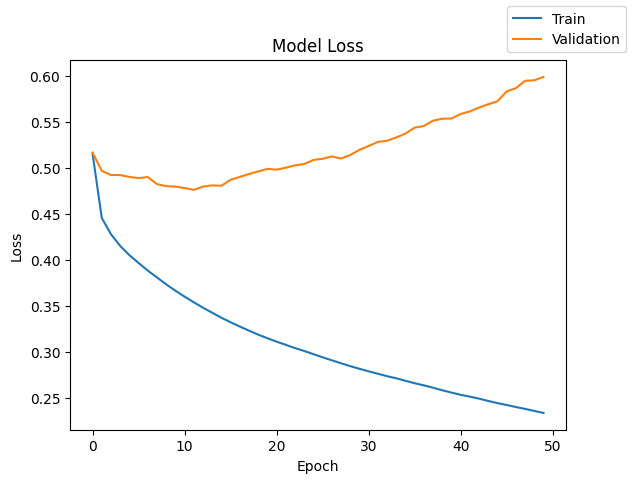

In [126]:
plot(history, 'loss')

* Validation loss is increased where as training loss is decreased

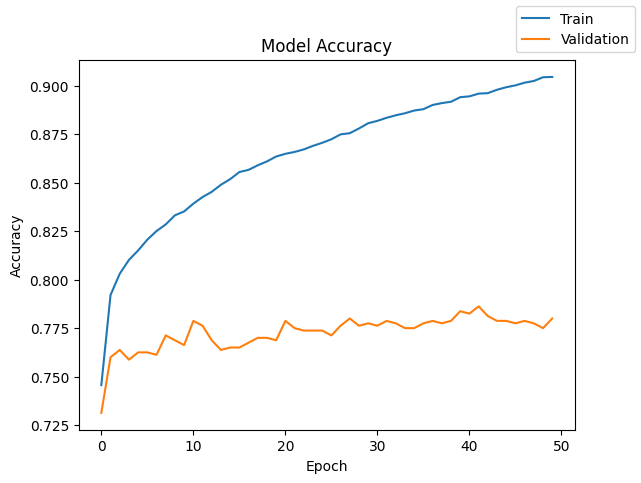

In [127]:
plot(history, 'accuracy')

* Accuracy for training icreased above 90% but validation accuracy is decreased and not consistent
* Model seems to be overfitting

In [128]:
# Check model performance on training over sampled data
model_6_train_perf = model_performance_classification(model_6, X_train_over, y_train_over)
model_6_train_perf

359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.902582,0.957788,0.862551,0.907678


In [129]:
# Check model performance on validation data
model_6_val_perf = model_performance_classification(model_6, X_val, y_val)
model_6_val_perf

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Accuracy,Recall,Precision,F1 Score
0,0.78,0.717791,0.473684,0.570732


* Recall score has increased for both train validation compare to model 5
* But there is difference is huge in training and validation recall so model is not generalized well

359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


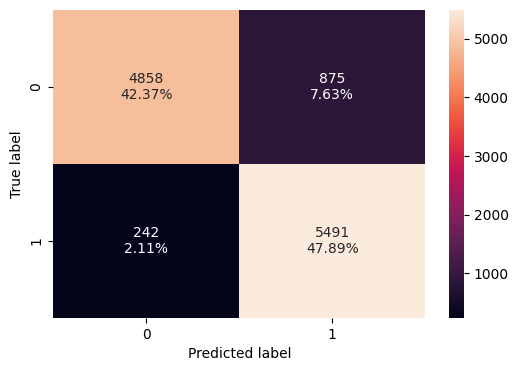

In [130]:
# Plot confusion matrix for training data
y_train_pred = model_6.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
make_confusion_matrix(y_train_over, y_train_pred)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


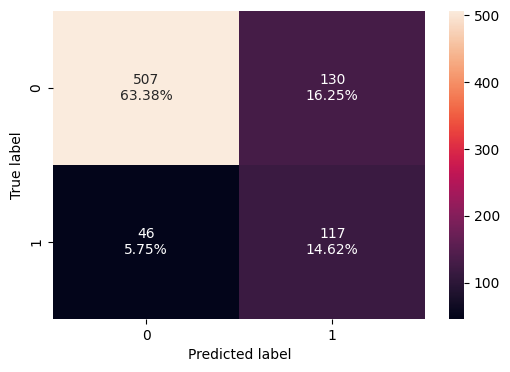

In [131]:
# Plot confusion matrix for validation data
y_val_pred = model_6.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

##### Model 7
* Let's try with dropout (0.2 & 0.1) along adam optimizer with learning rate 0.0001 and SMOTE data

In [132]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [133]:
# Initializing the model
model_7 = Sequential()

# Adding the input layer with 64 neurons and ReLU activation function
model_7.add(Dense(64, activation='relu',kernel_initializer=HeNormal(), input_dim=X_train_over.shape[1]))

# Add dropout of 0.2
model_7.add(Dropout(0.2))

# Adding a hidden layer with 32 neurons and ReLU activation function
model_7.add(Dense(32, activation='tanh'))

# Add dropout of 0.1
model_7.add(Dropout(0.1))

# Adding another hidden layer with 16 neurons and ReLU activation function
model_7.add(Dense(16, activation='tanh'))

# Adding the output layer with 1 neuron and sigmoid activation function (for binary classification)
model_7.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_7.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start = time.time()
history = model_7.fit(X_train_over, y_train_over, validation_data=(X_val,y_val), epochs=70, batch_size=32, verbose=1)
end=time.time()

Epoch 1/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5236 - loss: 0.7275 - val_accuracy: 0.7325 - val_loss: 0.5951
Epoch 2/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6744 - loss: 0.6150 - val_accuracy: 0.7450 - val_loss: 0.5580
Epoch 3/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7067 - loss: 0.5796 - val_accuracy: 0.7500 - val_loss: 0.5441
Epoch 4/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7209 - loss: 0.5645 - val_accuracy: 0.7475 - val_loss: 0.5347
Epoch 5/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7284 - loss: 0.5586 - val_accuracy: 0.7437 - val_loss: 0.5304
Epoch 6/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7231 - loss: 0.5547 - val_accuracy: 0.7475 - val_loss: 0.5159
Epoch 7/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7312 - loss: 0.5421 - val_accuracy: 0.7487 - val_loss: 0.5159
Epoch 8/70
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7363 - loss: 0.5407 - val_accuracy: 0.

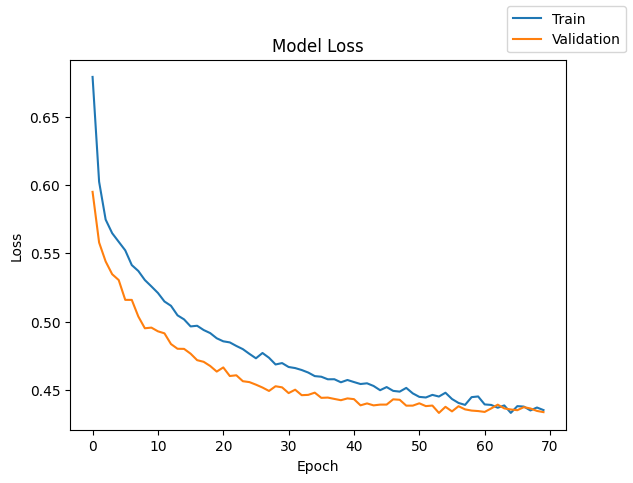

In [134]:
plot(history, 'loss')

* Training and validation loss has reduced and consistent

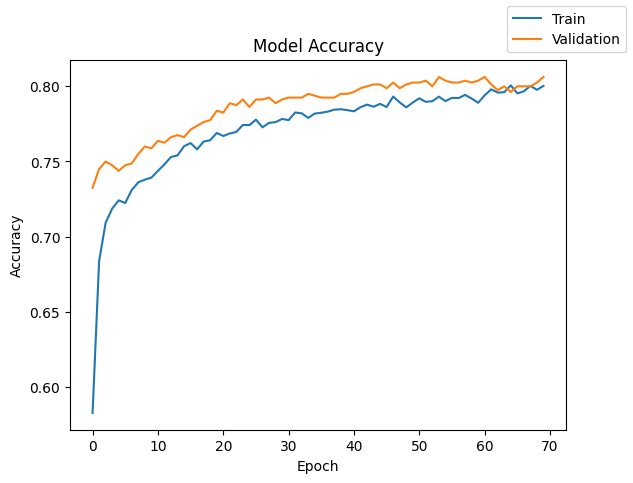

In [135]:
plot(history, 'accuracy')

* Training and validation accuracy consistent and close to 80%

In [136]:
# Check model performance on oversampled train data
model_7_train_perf = model_performance_classification(model_7, X_train_over, y_train_over)
model_7_train_perf

359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.816763,0.824001,0.812242,0.818079


In [137]:
# Check model performance on validation data
model_7_val_perf = model_performance_classification(model_7, X_val, y_val)
model_7_val_perf

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Accuracy,Recall,Precision,F1 Score
0,0.80625,0.779141,0.51626,0.621027


* Training and validation recall is close to 80% which indicated model gives better results than model 6, still there a difference of around 5% in recall scores, let's see if we can optimize further

359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


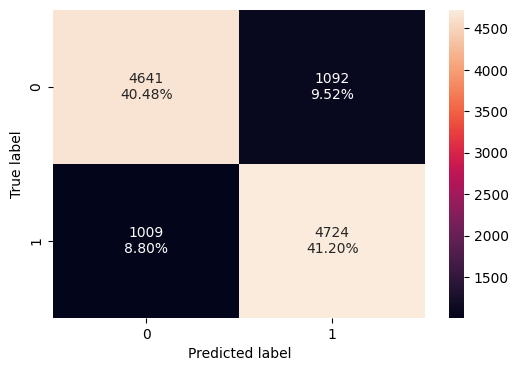

In [138]:
# Plot confusion matrix for oversampled train dataset
y_train_pred = model_7.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
make_confusion_matrix(y_train_over, y_train_pred)

In [139]:
# Classification report
cr=classification_report(y_train_over,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      5733
           1       0.81      0.82      0.82      5733

    accuracy                           0.82     11466
   macro avg       0.82      0.82      0.82     11466
weighted avg       0.82      0.82      0.82     11466



25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


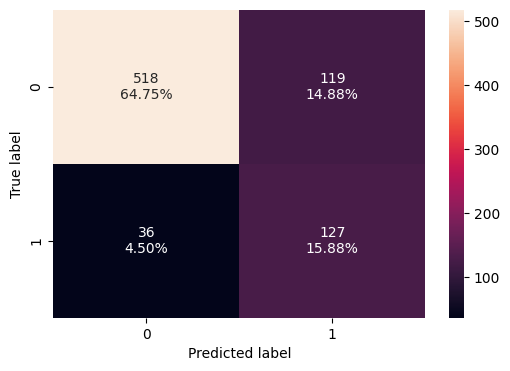

In [140]:
# Confusion matrix for validation dataset
y_val_pred = model_7.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
make_confusion_matrix(y_val, y_val_pred)

In [141]:
# Classification report for validation
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       637
           1       0.52      0.78      0.62       163

    accuracy                           0.81       800
   macro avg       0.73      0.80      0.75       800
weighted avg       0.85      0.81      0.82       800



#### Model 8

* Let's try with Relu activation for all 2 hidden layers along adam optimizer
* As adam with learning rate 0.0001 is giving better results let's keep the learning rate constant for further models

In [283]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [284]:
model_8 = Sequential()

# Input layer
model_8.add(Dense(32, activation='relu', kernel_initializer=HeNormal(), input_dim=X_train_over.shape[1]))

# Hidden layers
model_8.add(Dense(16, activation='relu', kernel_initializer=HeNormal()))


# Output layer
model_8.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_8.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_8.fit(X_train_over, y_train_over, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])


Epoch 1/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4788 - loss: 0.7824 - val_accuracy: 0.5350 - val_loss: 0.7002
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5663 - loss: 0.6879 - val_accuracy: 0.5938 - val_loss: 0.6548
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6367 - loss: 0.6395 - val_accuracy: 0.6675 - val_loss: 0.6165
Epoch 4/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6841 - loss: 0.6050 - val_accuracy: 0.7287 - val_loss: 0.5849
Epoch 5/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7117 - loss: 0.5759 - val_accuracy: 0.7475 - val_loss: 0.5590
Epoch 6/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7280 - loss: 0.5512 - val_accuracy: 0.7600 - val_loss: 0.5381
Epoch 7/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7429 - loss: 0.5313 - val_accuracy: 0.7700 - val_loss: 0.5215
Epoch 8/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7546 - loss: 0.5160 - val_accu

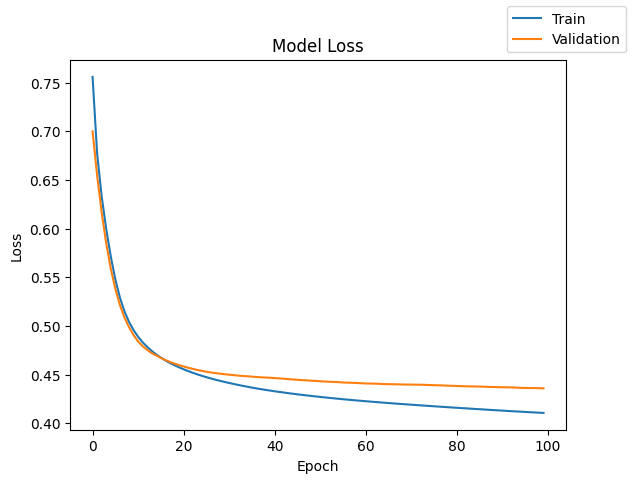

In [285]:
plot(history, 'loss')

* Training and validation loss is almost similar and showing smooth curve

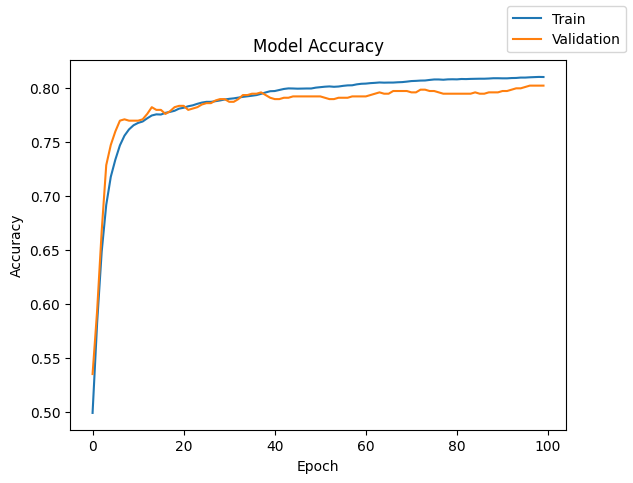

In [286]:
plot(history, 'accuracy')

* Training and validation accuracy is also close and converging better with little osciallation in validation set

In [287]:
# Check performance on train
model_8_train_perf = model_performance_classification(model_8, X_train_over, y_train_over)
model_8_train_perf

359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.811181,0.802896,0.816424,0.809603


In [288]:
# Check performance on validation set
model_8_val_perf = model_performance_classification(model_8, X_val, y_val)
model_8_val_perf

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Accuracy,Recall,Precision,F1 Score
0,0.8025,0.723926,0.510823,0.598985


* There is a difference of around 8% in training validation set which suggests there is scope to imporve recall and generalize model

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


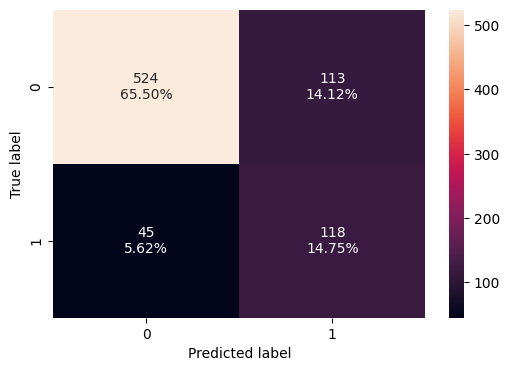

In [289]:
# Confusion matrxi for validation
y_val_pred = model_8.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
make_confusion_matrix(y_val, y_val_pred)

Model 9

Let's try witn Adam optimizer with learning rate 0.0001, and layes of 22,11,1

In [227]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [228]:
# Initializing the neural network
model_9 = Sequential()

# Input layer
model_9.add(Dense(22, activation='relu', kernel_initializer=HeNormal(), input_dim=X_train_over.shape[1]))

# Hidden layers
model_9.add(Dense(11, activation='relu', kernel_initializer=HeNormal()))


# Output layer
model_9.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_9.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_9.fit(X_train_over, y_train_over, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4254 - loss: 0.8370 - val_accuracy: 0.4588 - val_loss: 0.7464
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4932 - loss: 0.7274 - val_accuracy: 0.5537 - val_loss: 0.6850
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5800 - loss: 0.6680 - val_accuracy: 0.6062 - val_loss: 0.6431
Epoch 4/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6454 - loss: 0.6309 - val_accuracy: 0.6525 - val_loss: 0.6151
Epoch 5/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6813 - loss: 0.6056 - val_accuracy: 0.6787 - val_loss: 0.5942
Epoch 6/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6987 - loss: 0.5864 - val_accuracy: 0.6963 - val_loss: 0.5776
Epoch 7/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7123 - loss: 0.5711 - val_accuracy: 0.7050 - val_loss: 0.5641
Epoch 8/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7261 - loss: 0.5586 - val_accu

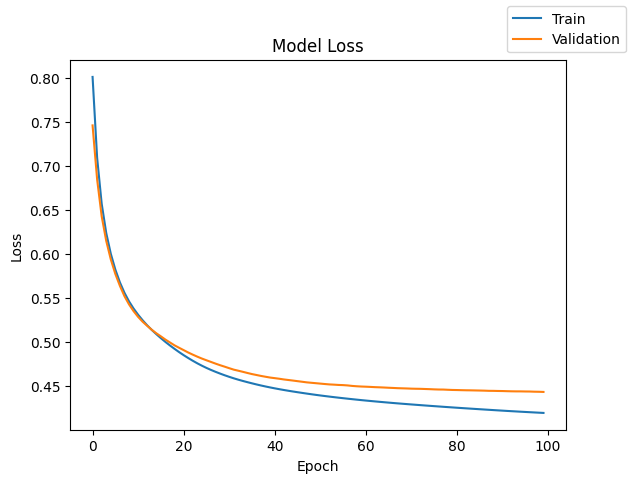

In [229]:
plot(history, 'loss')

* The difference between training and validation loss is reduced to greated extent

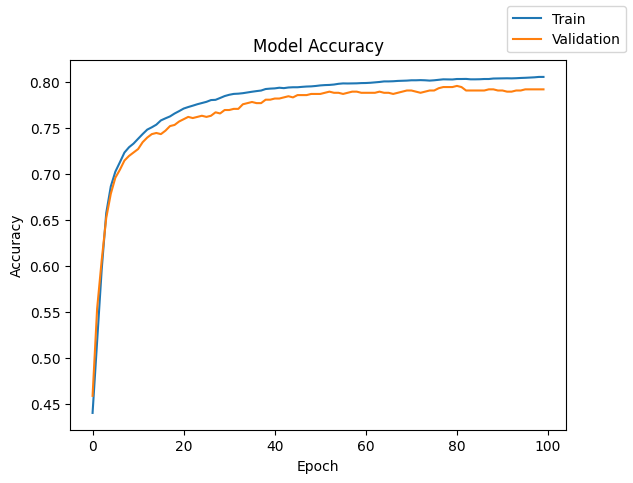

In [230]:
plot(history, 'accuracy')

* Accuracy score of training and validation is increased and showing smooth converge

In [231]:
# Check performance on train
model_9_train_perf = model_performance_classification(model_9, X_train, y_train)
model_9_train_perf

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.79875,0.750511,0.504121,0.603122


In [232]:
# Check performance on validation
model_9_val_perf = model_performance_classification(model_9, X_val, y_val)
model_9_val_perf

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Accuracy,Recall,Precision,F1 Score
0,0.7925,0.742331,0.493878,0.593137


* Though it has little less recall around 75% for both train and validation, models seems to be generlizing well on unknow data

359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


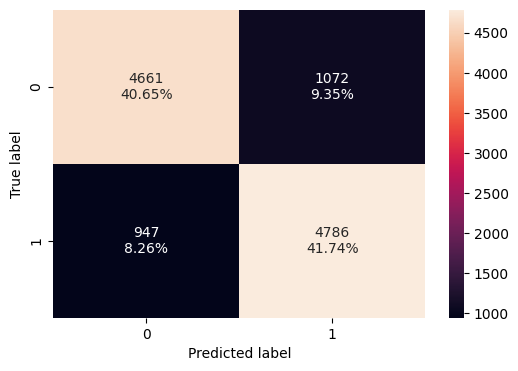

In [225]:
# Plot confusion matrix for train set
y_train_pred = model_9.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
make_confusion_matrix(y_train_over, y_train_pred)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


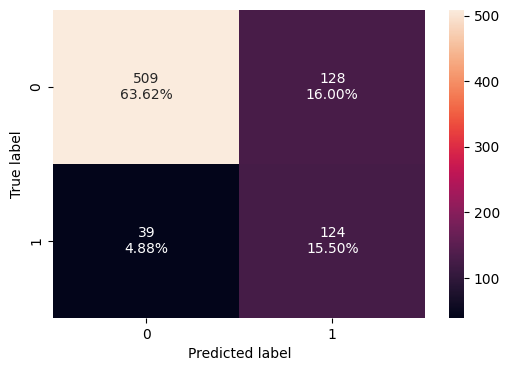

In [226]:
# Confusion matrix for validation set
y_val_pred = model_9.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
make_confusion_matrix(y_val, y_val_pred)

Model 10

* As we can see in above model recall is around 75% but model is giving generalized results, let's try to improve performance by regularzing model with l1 & l2 reguralizers with coefficient 0.01

In [275]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [276]:
from tensorflow.keras.regularizers import l1, l2, l1_l2
# Initializing the neural network
model_10 = Sequential()

# Input layer
model_10.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01), input_dim=X_train_over.shape[1]))
# Hidden layers
model_10.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))

# Output layer
model_10.add(Dense(1, activation='sigmoid', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_10.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_10.fit(X_train_over, y_train_over, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4822 - loss: 1.6272 - val_accuracy: 0.6488 - val_loss: 1.4709
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6021 - loss: 1.4565 - val_accuracy: 0.7312 - val_loss: 1.3157
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6818 - loss: 1.3195 - val_accuracy: 0.7312 - val_loss: 1.1928
Epoch 4/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7102 - loss: 1.1996 - val_accuracy: 0.7387 - val_loss: 1.0889
Epoch 5/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7232 - loss: 1.0922 - val_accuracy: 0.7400 - val_loss: 0.9974
Epoch 6/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7327 - loss: 1.0004 - val_accuracy: 0.7400 - val_loss: 0.9205
Epoch 7/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7375 - loss: 0.9247 - val_accuracy: 0.7462 - val_loss: 0.8556
Epoch 8/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7400 - loss: 0.8619 - val_accu

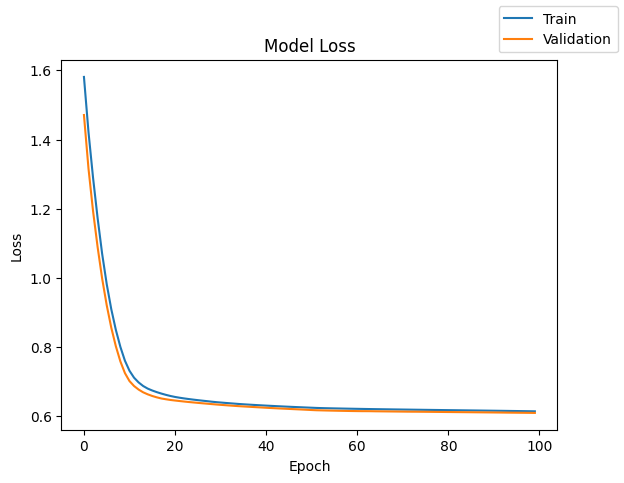

In [277]:
plot(history, 'loss')

* The difference between train and test loss is reduced and shows very smooth curve.

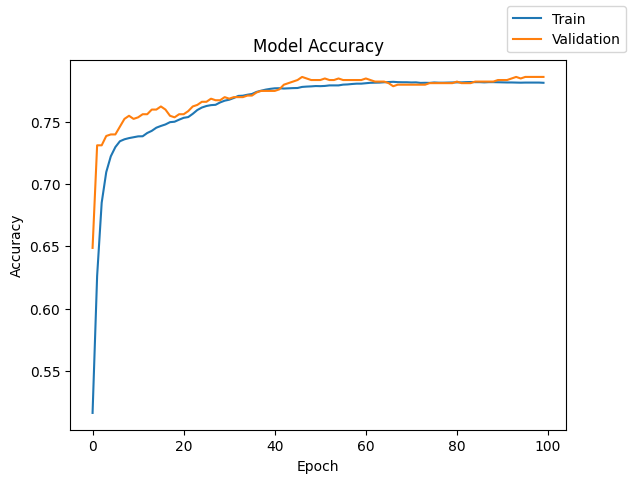

In [278]:
plot(history, 'accuracy')

* The train and validation accuracies are also almost similar, though there are slight oscialltions in validation accuracy in initial epochs, later the  accuracy are very close.
This shows that the chances of overfitting are very low

In [279]:
# Check training performance
model_10_train_perf = model_performance_classification(model_10, X_train_over, y_train_over)
model_10_train_perf

359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.780656,0.794523,0.773082,0.783656


In [280]:
# Check validation performance
model_10_val_perf = model_performance_classification(model_10, X_val, y_val)
model_10_val_perf

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Accuracy,Recall,Precision,F1 Score
0,0.78625,0.791411,0.484962,0.601399


* The recall is very cosistent i.e. aroun d 80% with training and validation set. Model generalized well

359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


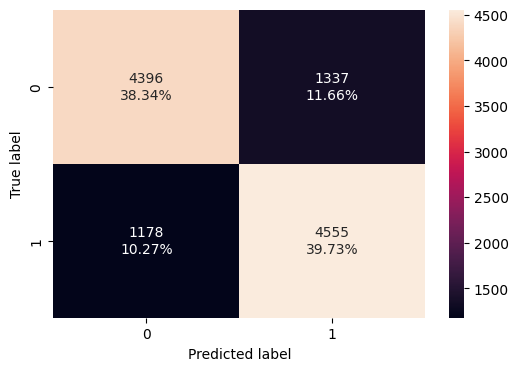

In [281]:
# Confusion matrix for train set
y_train_pred = model_10.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
make_confusion_matrix(y_train_over, y_train_pred)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


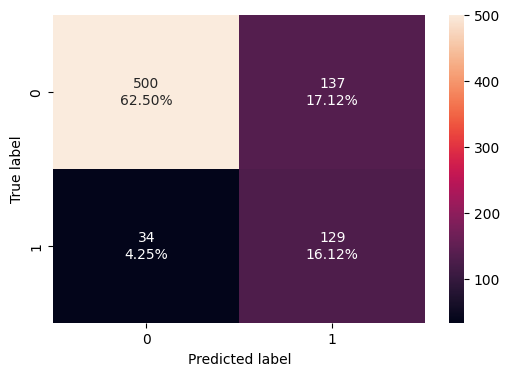

In [282]:
# Confusion matrxi for validation set
y_val_pred = model_10.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
make_confusion_matrix(y_val, y_val_pred)

## Model Performance Comparison and Final Model Selection

In [3]:
# training performance comparison
models_train_perf_df = pd.concat(
    [model_1_train_perf.T,
    model_2_train_perf.T,
    model3_train_perf.T,
    model_4_train_perf.T,
    model_5_train_perf.T,
    model_6_train_perf.T,
    model_7_train_perf.T,
    model_8_train_perf.T,
    model_9_train_perf.T,
    model_10_train_perf.T],
    axis=1)

models_train_perf_df.columns = [
    "NN M1 (SGD)",
    "NN M2 (SGD with Momentum)",
    "NN M3 (Adam)",
    "NN M4 (Adam, dropout [0.2,0.1])",
    "NN M5 (SMOTE and SGD)",
    "NN M6 (SMOTE and Adam)",
    "NN M7 (SMOTE, Adam(0.0001), and dropout [0.2,0.1])",
    "NN M8 (SMOTE, Adam(0.0001), and 2 hidden layer)",
    "NN M9 (SMOTE, Adam(0.0001), and 1 hidden layer)",
    "NN M10 (SMOTE, Adam(0.0001) and Regularization l1,l2 coeff(0.01))"
]

NameError: name 'pd' is not defined

In [317]:
# Validation perforamance comparison
models_val_perf_df = pd.concat(
    [model_1_Val_perf.T,
     model_2_Val_perf.T,
     model3_val_perf.T ,
     model_4_val_perf.T,
     model_5_val_perf.T,
     model_6_val_perf.T,
     model_7_val_perf.T,
     model_8_val_perf.T,
     model_9_val_perf.T,
     model_10_val_perf.T],
    axis=1)


models_val_perf_df.columns = [
    "NN M1 (SGD)",
    "NN M2 (SGD with Momentum)",
    "NN M3 (Adam)",
    "NN M4 (Adam, dropout [0.2,0.1])",
    "NN M5 (SMOTE and SGD)",
    "NN M6 (SMOTE and Adam)",
    "NN M7 (SMOTE, Adam(0.0001), and dropout [0.2,0.1])",
    "NN M8 (SMOTE, Adam(0.0001), and 2 hidden layer)",
    "NN M9 (SMOTE, Adam(0.0001), and 1 hidden layer)",
    "NN M10 (SMOTE, Adam(0.0001) and Regularization l1,l2 coeff(0.01))"
]

In [318]:
models_train_perf_df

,NN M1 (SGD),NN M2 (SGD with Momentum),NN M3 (Adam),"NN M4 (Adam, dropout [0.2,0.1])",NN M5 (SMOTE and SGD),NN M6 (SMOTE and Adam),"NN M7 (SMOTE, Adam, and dropout [0.2,0.1])","NN M8 (SMOTE, Adam, and 2 hidden layer)","NN M9 (SMOTE, Adam, and 1 hidden layer)","NN M10 (SMOTE, Adam and Regularization l1,l2)"
Accuracy,0.798194,0.822083,0.853333,0.814167,0.843276,0.902582,0.816763,0.811181,0.798750,0.780656
Recall,0.805044,0.846626,0.809816,0.790729,0.867609,0.957788,0.824001,0.802896,0.750511,0.794523
Precision,0.502981,0.540470,0.604580,0.529439,0.827345,0.862551,0.812242,0.816424,0.504121,0.773082
F1 Score,0.619135,0.659761,0.692308,0.634226,0.846999,0.907678,0.818079,0.809603,0.603122,0.783656


In [319]:
models_val_perf_df

,NN M1 (SGD),NN M2 (SGD with Momentum),NN M3 (Adam),"NN M4 (Adam, dropout [0.2,0.1])",NN M5 (SMOTE and SGD),NN M6 (SMOTE and Adam),"NN M7 (SMOTE, Adam, and dropout [0.2,0.1])","NN M8 (SMOTE, Adam, and 2 hidden layer)","NN M9 (SMOTE, Adam, and 1 hidden layer)","NN M10 (SMOTE, Adam and Regularization l1,l2)"
Accuracy,0.783750,0.796250,0.823750,0.808750,0.776250,0.780000,0.806250,0.802500,0.792500,0.786250
Recall,0.785276,0.754601,0.711656,0.791411,0.723926,0.717791,0.779141,0.723926,0.742331,0.791411
Precision,0.481203,0.500000,0.552381,0.520161,0.468254,0.473684,0.516260,0.510823,0.493878,0.484962
F1 Score,0.596737,0.601467,0.621984,0.627737,0.568675,0.570732,0.621027,0.598985,0.593137,0.601399


In [296]:
# check difference between models_train_perf_df & models_val_perf_df and highlight recall less 5% differences with green in rows

# Calculate the difference between training and validation performance for the 'Recall' metric
diff_df = models_train_perf_df.loc['Recall'] - models_val_perf_df.loc['Recall']

# Create a styled DataFrame to highlight differences
styled_diff_df = diff_df.to_frame(name='Recall Difference').style.apply(lambda x: ['background-color: lightgreen' if abs(v) < 0.05 else '' for v in x], axis=0)

# Display the styled DataFrame
styled_diff_df

,Recall Difference
NN M1 (SGD),0.019768
NN M2 (SGD with Momentum),0.092025
NN M3 (Adam),0.098160
"NN M4 (Adam, dropout [0.2,0.1])",-0.000682
NN M5 (SMOTE and SGD),0.143682
NN M6 (SMOTE and Adam),0.239997
"NN M7 (SMOTE, Adam, and dropout [0.2,0.1])",0.044860
"NN M8 (SMOTE, Adam, and 2 hidden layer)",0.078969
NN M9,0.008180
NN M10,0.003112


* **Final Model:** Model 10 - Neural Network  Neural Network with (SMOTE, Adam with learning rate 0.0001 & kernel regularlizer)
* **Reasoning:** As we are focusing on maximized recall
     * Considering all model peroformances we can see that model 4, 9 and 10 are giving better recall on train and test data with generalized performance.
     * Among all **model 10 is generalizing well with recall score around 80% for training and around 80% for validation dataset**


#### Model Evaluation


Let's build the final model (based on selected model 10) and evaluate test data

In [307]:
# Final model build to evaluate on test data
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [308]:
# Initializing the model
from tensorflow.keras.regularizers import l1, l2, l1_l2
# Initializing the neural network
model = Sequential()

# Input layer
model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01), input_dim=X_train_over.shape[1]))
# Hidden layers
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))

# Output layer
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_over, y_train_over, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4822 - loss: 1.6272 - val_accuracy: 0.6488 - val_loss: 1.4709
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6021 - loss: 1.4565 - val_accuracy: 0.7312 - val_loss: 1.3157
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6818 - loss: 1.3195 - val_accuracy: 0.7312 - val_loss: 1.1928
Epoch 4/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7102 - loss: 1.1996 - val_accuracy: 0.7387 - val_loss: 1.0889
Epoch 5/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7232 - loss: 1.0922 - val_accuracy: 0.7400 - val_loss: 0.9974
Epoch 6/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7327 - loss: 1.0004 - val_accuracy: 0.7400 - val_loss: 0.9205
Epoch 7/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7375 - loss: 0.9247 - val_accuracy: 0.7462 - val_loss: 0.8556
Epoch 8/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7400 - loss: 0.8619 - val_accu

In [309]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,789 (10.90 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,860 (7.27 KB)

In [311]:
# Check performance on training set
model_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_train_perf

359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.780656,0.794523,0.773082,0.783656


In [312]:
# Check performance on validation set
model_val_perf = model_performance_classification(model, X_val, y_val)
model_val_perf

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.78625,0.791411,0.484962,0.601399


In [313]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7584 - loss: 0.6123


[0.6222081184387207, 0.7580000162124634]

In [314]:
# Check performance on test set
model_test_perf = model_performance_classification(model, X_test, y_test)
model_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.758,0.769042,0.445235,0.563964


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


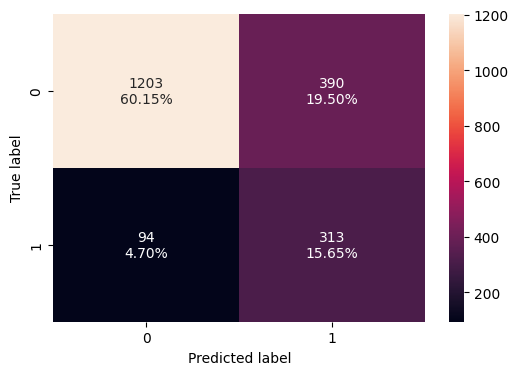

In [315]:
# Confusion matrix for test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
make_confusion_matrix(y_test, y_test_pred)

* Model is giving 76% recall on test data.
* Model can be further tuned based on other trial combinations of parameters.
* Also collecting more data to train the model would yeild in better results.

## Actionable Insights and Business Recommendations

**Increase Engagement for Inactive Members:** Focus on the 48% inactive customers by offering re-engagement campaigns, personalized offers, and loyalty programs to encourage activity.

**Target 40-55 Age Group for Retention:** Develop tailored financial products and proactive retention efforts for customers in the 40-55 age group, as they have the highest churn rate.

**Engage Younger Customers:** Focus on retaining younger customers (30-40 years old) by encouraging product usage early and offering cross-selling opportunities.

**Proactive Retention for Older Customers:** For customers aged 70+, offer premium services such as dedicated relationship managers or financial planning to ensure satisfaction and loyalty.

**Focus on High-Risk Churn Segments (Low Tenure & Low Balance):** Actively target customers with low tenure or low balances to prevent early churn, offering tailored products or incentives to increase account activity.

**Monitor and Address High Churn in Germany:** Investigate regional factors behind the higher churn rate in Germany (32%) and consider offering localized products, promotions, or customer service initiatives to reduce churn in this segment.

**Retain Customers with Higher Bank Balances:** For customers with balances between $50K-$150K, offer personalized premium services, investment opportunities, and exclusive financial advice to improve retention.

**Credit Card Users Retention:** Leverage the high credit card ownership (70%) to offer additional products such as loans, insurance, or savings plans to increase engagement and reduce churn.

**Target Female Customers with Personalized Offers**: With a higher churn rate among females, create gender-specific retention campaigns or tailored financial products, such as savings or investment plans designed for women.

**Increase Retention of Customers with Multiple Products:** For customers with 2 or more products, offer loyalty benefits, bundle deals, or exclusive services to reinforce their relationship with the bank.

**Improve Experience for Customers with Medium Credit Scores:** Offer targeted advice, credit score improvement programs, or tailored interest rate offers to retain customers with medium credit scores (600–700).

**Enhance Customer Satisfaction Among Active Members:** Identify reasons for inactivity and implement satisfaction surveys or direct engagement initiatives to convert inactive members into active ones.

**Expand Cross-Selling for Long-Tenure Customers:** Customers with 2-8 years of tenure are likely to stay, so offer them additional products or services based on their financial behavior and needs.

**Implement a Retention Program for High Value Customers:** Focus on customers with a higher balance (especially those in the $50K-$150K range) by providing them with exclusive offers, loyalty rewards, and personalized banking services.

**Analyze Churn by Demographic and Product Usage:** Use demographic data (age, gender, region) and product usage patterns to further segment customers and develop tailored retention campaigns based on their specific profiles.


In [2]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/AIMLCourse/Introduction_To_Neural_Networks/Project04/INN_Learner_Notebook_Full_code_Shraddha_V1.ipynb' --output-dir '/content/drive/MyDrive/Colab Notebooks/AIMLCourse/Introduction_To_Neural_Networks/Project04'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/AIMLCourse/Introduction_To_Neural_Networks/Project04/INN_Learner_Notebook_Full_code_Shraddha_V1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 62 image(s).
[NbConvertApp] Writing 2909943 bytes to /content/drive/MyDrive/Colab Notebooks/AIMLCourse/Introduction_To_Neural_Networks/Project04/INN_Learner_Notebook_Full_code_Shraddha_V1.html


<font size=6 color='blue'>Power Ahead</font>
___